In [3]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
orders = pd.read_csv('data/purchase_order.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [5]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [8]:
orders['Product'].head()

0       P0006944501
1       P0006018073
2       P0002267974
3       P0016144236
4    P0014516980122
Name: Product, dtype: object

In [12]:
orders[orders['Product'] == 'P0006944501']['Price'].mean()

1069.0

In [14]:
orders['Product'].unique()

array(['P0006944501', 'P0006018073', 'P0002267974', ..., 'P0022884606',
       'P0013911085', 'P0025123755'], dtype=object)

In [16]:
len(orders['Product'].unique())

20054

In [17]:
# select Product, avg(Price) from orders 
# group by Product limit 5

orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

In [22]:
# select Product, avg(Price) from orders 
# group by Product order by avg(Price) desc limit 5

orders.groupby('Product')['Price'].mean()\
.sort_values(ascending=False).head()

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [23]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']

In [25]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [28]:
#select User, sum(Total_Price) from orders
#gorup by User order by sum(Total_Price) desc limit 5

orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [29]:
import pandas as pd
m_cols = ['Time','Action','User','Product']
views = pd.read_csv('data/purchase_view.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
views.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [40]:
orders_cnt = orders.groupby(['User', 'Product'])['Product']\
.count().reset_index(name='buys')

In [42]:
views_cnt = views.groupby(['User', 'Product'])['Product']\
.count().reset_index(name='views')

In [44]:
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [46]:
views_cnt.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [47]:
merge_df = pd.merge(orders_cnt, views_cnt, on=['User','Product'], how='right')

In [49]:
merge_df.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1.0,2
1,U10000056953,P0013834251,1.0,7
2,U10000065461,P0023597022,1.0,1
3,U10000092625,P0023729451,1.0,14
4,U10000092625,P0024236730,1.0,4


In [51]:
views.head()

,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [53]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [61]:
# year, month, day, date, hour 
views['Dates'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: Dates, dtype: object

In [63]:
# select date, count(action) from views
# group by date
views_cnt_by_date  = views.groupby(views['Dates'].dt.date)['Action'].count()

In [66]:
?views_cnt_by_date.plot

Populating the interactive namespace from numpy and matplotlib


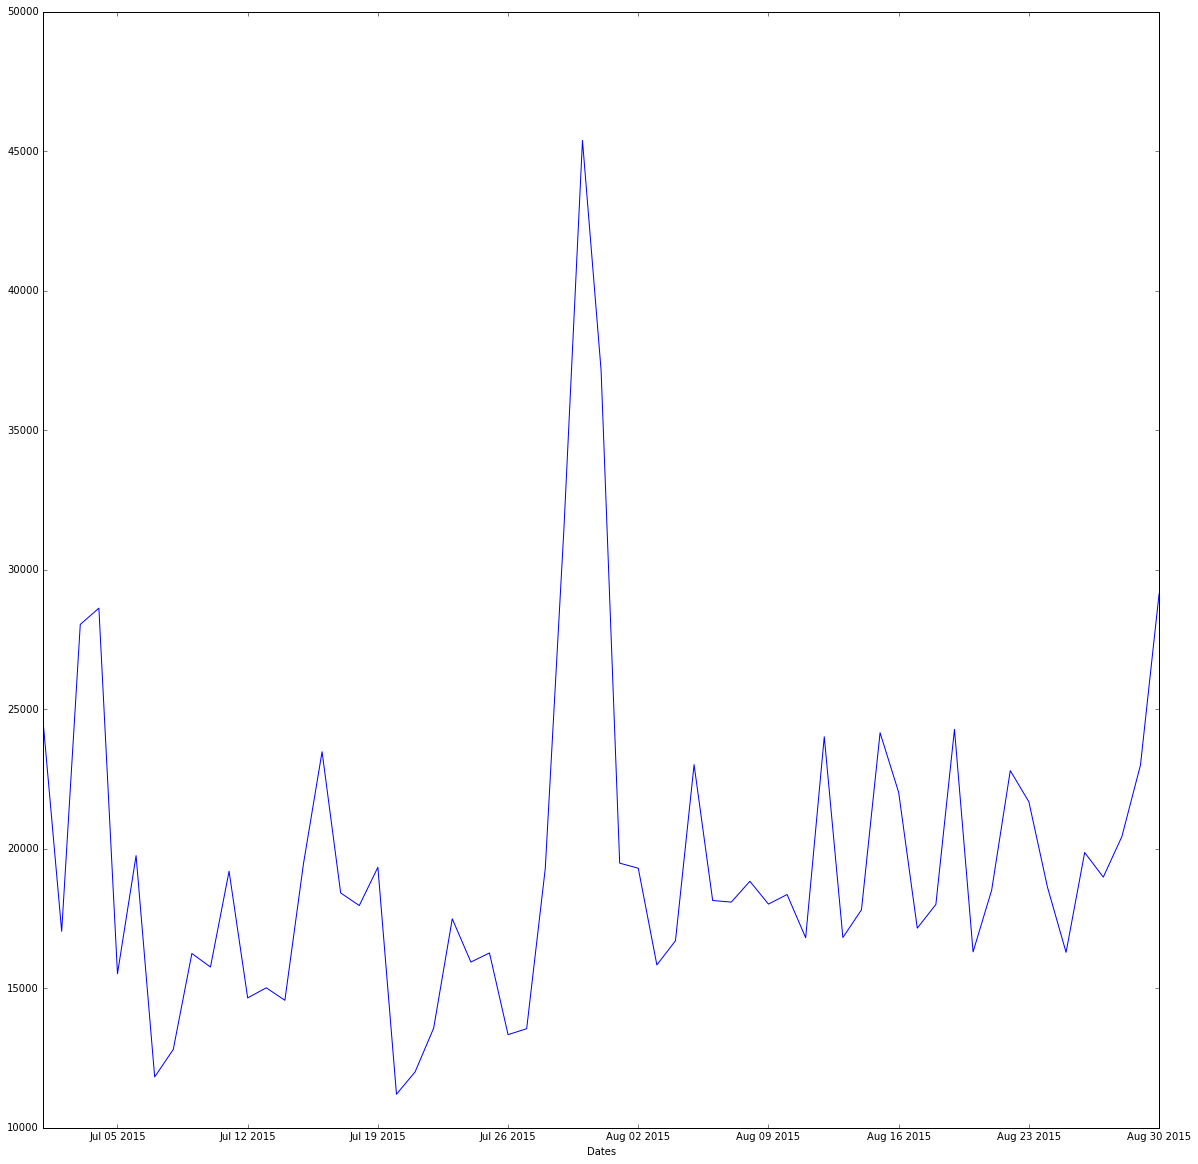

In [70]:
%pylab inline

views_cnt_by_date.plot(kind='line', figsize=[20,20])

In [71]:
views_cnt_by_hour  = views.groupby(views['Dates'].dt.hour)['Action'].count()

Populating the interactive namespace from numpy and matplotlib


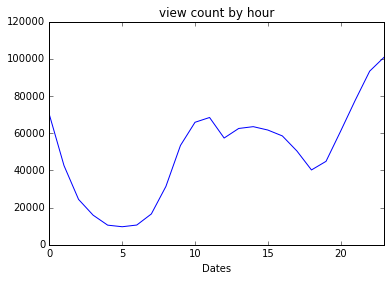

In [74]:
%pylab inline

views_cnt_by_hour.plot(kind='line', title = 'view count by hour')

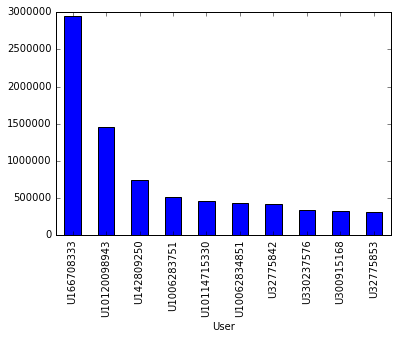

In [75]:
orders['Total_price'] = orders['Quantity'] * orders['Price']
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]
g.plot(kind="bar")


In [ ]:
merge_df.plot(kind="line")
